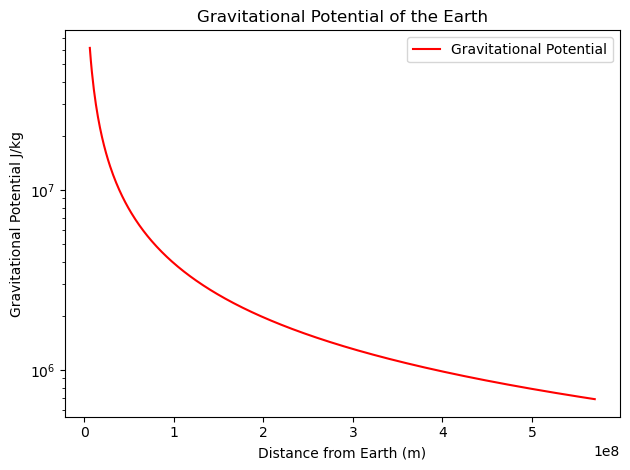

In [1]:
# part A
#1D- plot of the Gravitational Potential of the Earth as function of distance. 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
def phi(xM, yM, M,x, y):
    G = (6.67*10**-11) # m^3/kg/s^2
    r = np.sqrt((x - xM)**2 + (y - yM)**2) # m  distance from the mass 
    if np.isclose(x,xM) and np.isclose(y,yM):
        return np.nan    # avoiding dividing by 0 because i am treating the earth as a point particle
    else:
        return -(G*M)/r

M = (5.9*10**24) # kg mass of the earth
abs_phi = np.vectorize(phi)
x_vals = np.linspace(6378000,570000000,500) # distance of 1.5x from earth surface to moon
fig, ax = plt.subplots(1,1)
ax.plot(x_vals,abs(abs_phi(0,0,M,x_vals,0)),color = 'red',label="Gravitational Potential")
ax.set_yscale('log');
ax.set_title("Gravitational Potential of the Earth");
ax.set_xlabel("Distance from Earth (m)");
ax.set_ylabel("Gravitational Potential J/kg");
ax.legend()
fig.tight_layout()
# finished with the first plot now going on to the 2d color mesh

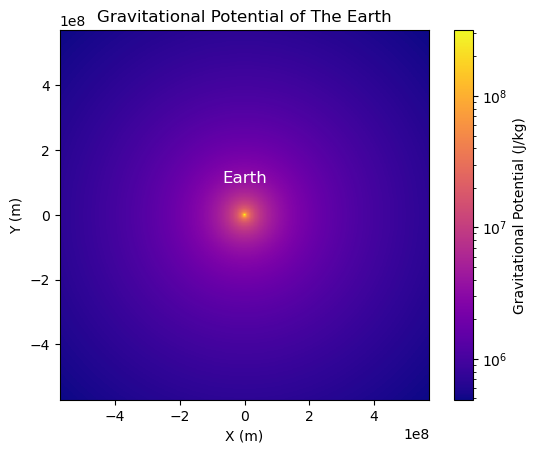

In [2]:
# part B
#colormesh of the gravitational potential of the Earth
from matplotlib.colors import LogNorm
x_vals2d = np.linspace(-570000000, 570000000, 650)  # define x and y vals
y_vals2d = np.linspace(-570000000, 570000000, 650)
X, Y = np.meshgrid(x_vals2d, y_vals2d)
z = abs_phi(0, 0, M,X, Y)
fig2 , ax2 = plt.subplots(1,1);
colormesh = ax2.pcolormesh(X,Y,abs(z),norm=LogNorm(),cmap='plasma');
colorbar = fig2.colorbar(colormesh,ax=ax2);
colorbar.set_label("Gravitational Potential (J/kg)")
ax2.set_aspect('equal');
ax2.set_title("Gravitational Potential of The Earth");
ax2.set_xlabel("X (m)");
ax2.set_ylabel("Y (m)");
ax2.text(0,1*10**8,"Earth",horizontalalignment='center',fontsize=12,color='white');

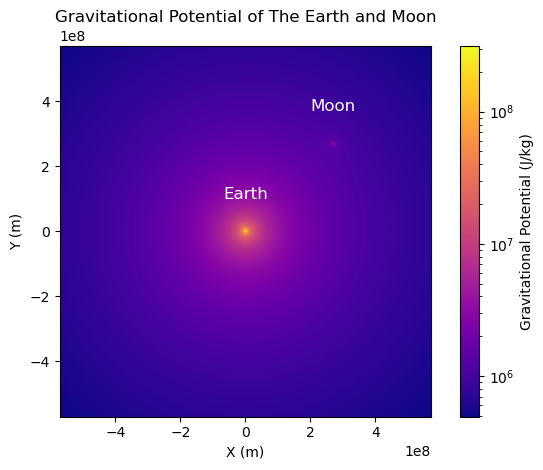

In [3]:
# problem 2
# colormesh of the gravitational potential of the earth and moon
M_earth = (5.9*10**24) # kg mass of the earth
M_moon = (7.3*10**22) # kg mass of the moon
d_earthtomoon = (3.8*10**8) # (m) distance from earth too moon in meters
z_earth = abs_phi(0, 0, M_earth, X, Y)    # function for earth
z_moon = abs_phi((d_earthtomoon/np.sqrt(2)),(d_earthtomoon/np.sqrt(2)),M_moon,X,Y)  # function for the moon
z_earth_moon = np.abs(z_earth+z_moon) # combine the earth and moon 

fig3 , ax3 = plt.subplots(1,1);
colormesh = ax3.pcolormesh(X,Y,z_earth_moon,norm=LogNorm(),cmap='plasma');
colorbar1 = fig3.colorbar(colormesh,ax=ax3);
colorbar1.set_label("Gravitational Potential (J/kg)")
ax3.set_aspect('equal');
ax3.set_title("Gravitational Potential of The Earth and Moon");
ax3.set_xlabel("X (m)");
ax3.set_ylabel("Y (m)");
ax3.text(0,1*10**8,"Earth",horizontalalignment='center',fontsize=12,color='white');
ax3.text((d_earthtomoon/np.sqrt(2)), (d_earthtomoon/np.sqrt(2))+1*10**8, "Moon", horizontalalignment='center', fontsize=12, color='white');
fig3.tight_layout()
plt.savefig("GravFig.jpg")

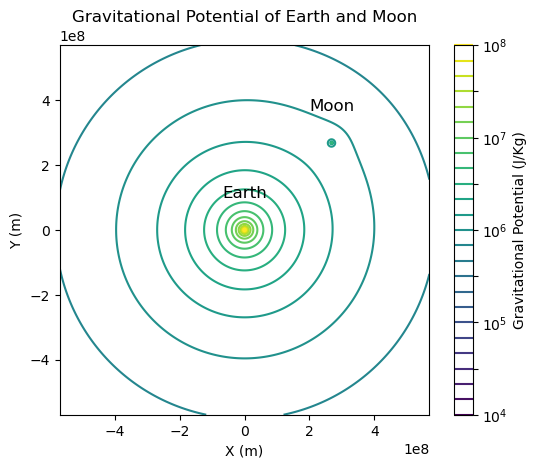

In [4]:
# contour plot of the gravitational potential of the earth and moon
fig4 , ax4 = plt.subplots(1,1);
level = np.logspace(4,8,25)
contourplot = ax4.contour(X,Y,z_earth_moon,levels=level,norm=LogNorm(),cmap='viridis')
colorbar2 = fig4.colorbar(contourplot);
colorbar2.set_label("Gravitational Potential (J/Kg)")
ax4.set_xlabel("X (m)");
ax4.set_ylabel("Y (m)");
ax4.text(0,1*10**8,"Earth",horizontalalignment='center',fontsize=12,color='black');
ax4.text((d_earthtomoon/np.sqrt(2)), (d_earthtomoon/np.sqrt(2))+1*10**8, "Moon", horizontalalignment='center', fontsize=12, color='black');
ax4.set_aspect('equal');
ax4.set_title("Gravitational Potential of Earth and Moon");

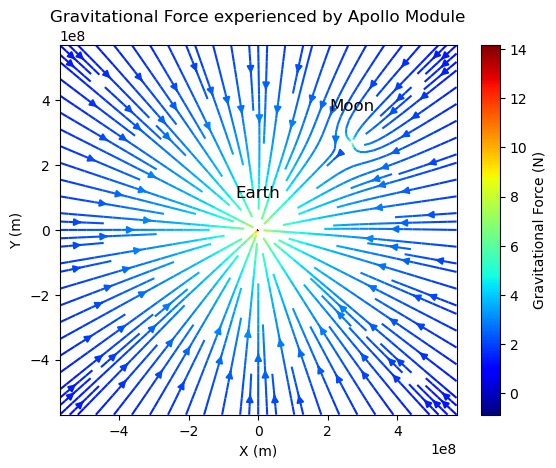

In [5]:
# Problem 3 part 1. 

def GravForce(x1,y1,x2,y2,M1):
    G = (6.67*10**-11) # m^3/kg/s^2
    rx = x2 - x1   # get the x and y components of the displacement vector
    ry = y2 - y1
    r_mag = np.sqrt(rx**2 + ry**2)
    m_apollo_module = 5500 # (kg) mass of the apollo command module 
    if np.isclose(x1,x2) and np.isclose(y1,y2):
        return np.nan    # avoiding dividing by 0 because i am treating the earth as a point particle as well as the other object
    else:
        F=-(G*M1*m_apollo_module)/(r_mag**2)
        Fx = F*(rx/r_mag)    # get the x and y components of the the force vector
        Fy = F*(ry/r_mag)
        return Fx, Fy
Grav_Force_vector = np.vectorize(GravForce) # vectoize my Function

Fx_earth, Fy_earth = Grav_Force_vector(0, 0, X, Y, M_earth)   # compute Fx and Fy for the module and earth
Fx_moon, Fy_moon = Grav_Force_vector(d_earthtomoon/np.sqrt(2), d_earthtomoon/np.sqrt(2), X, Y, M_moon)  # # compute Fx and Fy for the module and moon
Fx_all = Fx_earth + Fx_moon   # combine earth and moon x and y components
Fy_all = Fy_earth + Fy_moon


fig5, ax5 = plt.subplots(1,1)  
colors = np.log(np.hypot(abs(Fx_all),abs(Fy_all)))
stream = ax5.streamplot(X,Y,Fx_all,Fy_all, color=colors,cmap=cm.jet,density=1.5)
ax5.text(0,1*10**8,"Earth",horizontalalignment='center',fontsize=12,color='black');
ax5.text((d_earthtomoon/np.sqrt(2)), (d_earthtomoon/np.sqrt(2))+1*10**8, "Moon", horizontalalignment='center', fontsize=12, color='black');
ax5.set_title("Gravitational Force experienced by Apollo Module")
cbar = fig5.colorbar(stream.lines,ax=ax5)
cbar.set_label("Gravitational Force (N)")
ax5.set_xlabel("X (m)");
ax5.set_ylabel("Y (m)");
plt.savefig("GravForce.jpg")

In [6]:
# Problem 4
from scipy.integrate import quad
# Finding T the total burn time of the rocket
WM = 2.4*10**6 #kg wet mass of S-1C
DM = 7.5*10**5 # kg dry mass of the S-1C
M_dot = 1.3*10**4 # kg/s burn rate of the S-1C
T = (WM - DM)/(M_dot)  # total burn time of the saturn V rocket
ve = 2.4*10**3  # exhaust velocity of Saturn V
g = 9.81 # m/s^2 gravitational constant
print(T)

def deltav(t):
    if t >= T:
        return 0  # if it is burning for longer that the total burn time, then v should go to 0. 
    else:
        result = ve*(np.log((WM/(WM-M_dot*t))))-g*t
        return result
h, err = quad(deltav,0,T)   # altitude of the rocket at the end of burn
print(f"Altitude of rocket at end of burn {h} (m)")

126.92307692307692
Altitude of rocket at end of burn 64546.796157083234 (m)
